In [35]:
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt

In [36]:
def read_network(file_path):
    matrix = mmread(file_path)
    G = nx.from_scipy_sparse_array(matrix)
    return G

In [37]:
G = read_network('dolphins/dolphins.mtx')

In [46]:
def draw_graph(G, pos, title):
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_edges(G, pos, alpha=0.12, edge_color="gray")

    deg = dict(G.degree())
    node_sizes = [10 + deg[n] * 8 for n in G.nodes()]

    nodes = nx.draw_networkx_nodes(
        G,
        pos,
        node_size=node_sizes,
        linewidths=0.2,
        edgecolors="k",
        alpha=0.95,
    )
    plt.title(title)
    plt.axis("off")
    plt.show()

## arf layout

The attractive and repulsive forces (arf) layout improves the spring layout in three ways. First, it prevents congestion of highly connected nodes due to strong forcing between nodes. Second, it utilizes the layout space more effectively by preventing large gaps that spring layout tends to create. Lastly, the arf layout represents symmetries in the layout better than the default spring layout.

Unlike a basic spring layout, ARF adapts force strengths so hubs don't collapse and empty regions don't blow up, giving a more even, readable spread.

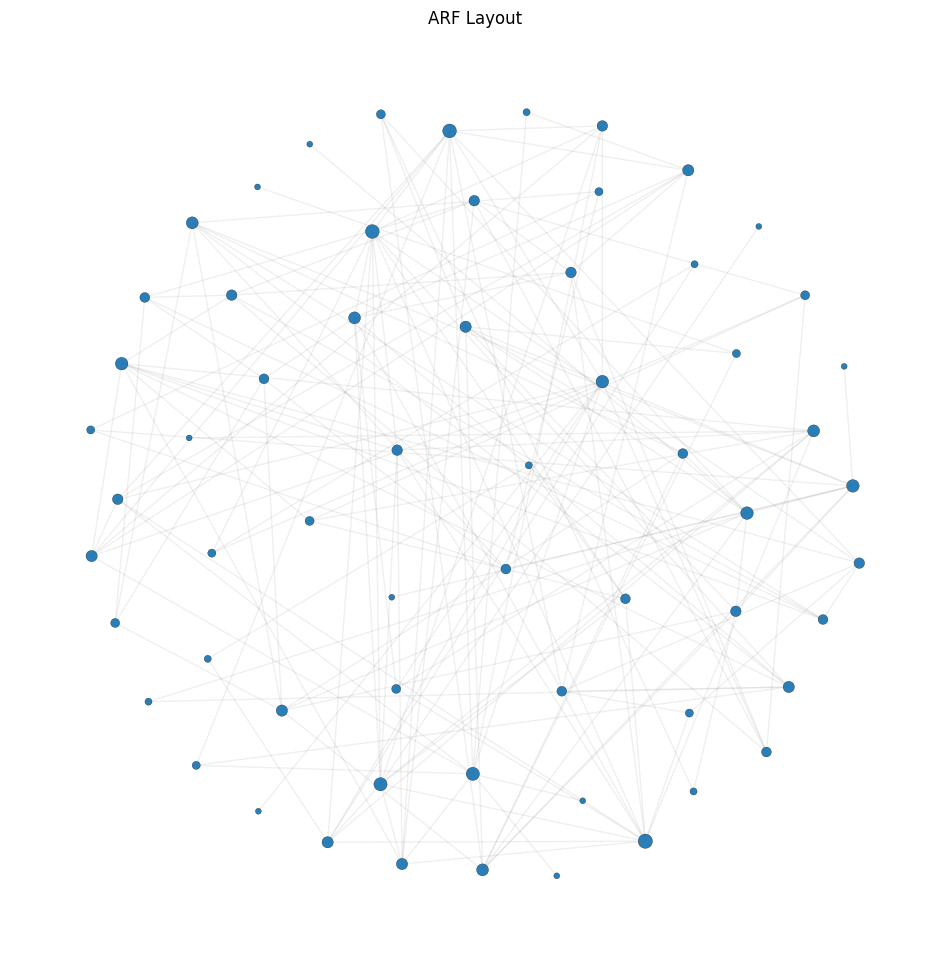

In [47]:
pos_arf = nx.arf_layout(G)
scale = 3.0
pos_arf = {n: (x * scale, y * scale) for n, (x, y) in pos_arf.items()}

draw_graph(G, pos_arf, "ARF Layout")

## bipartite layout

Position nodes in two straight lines.

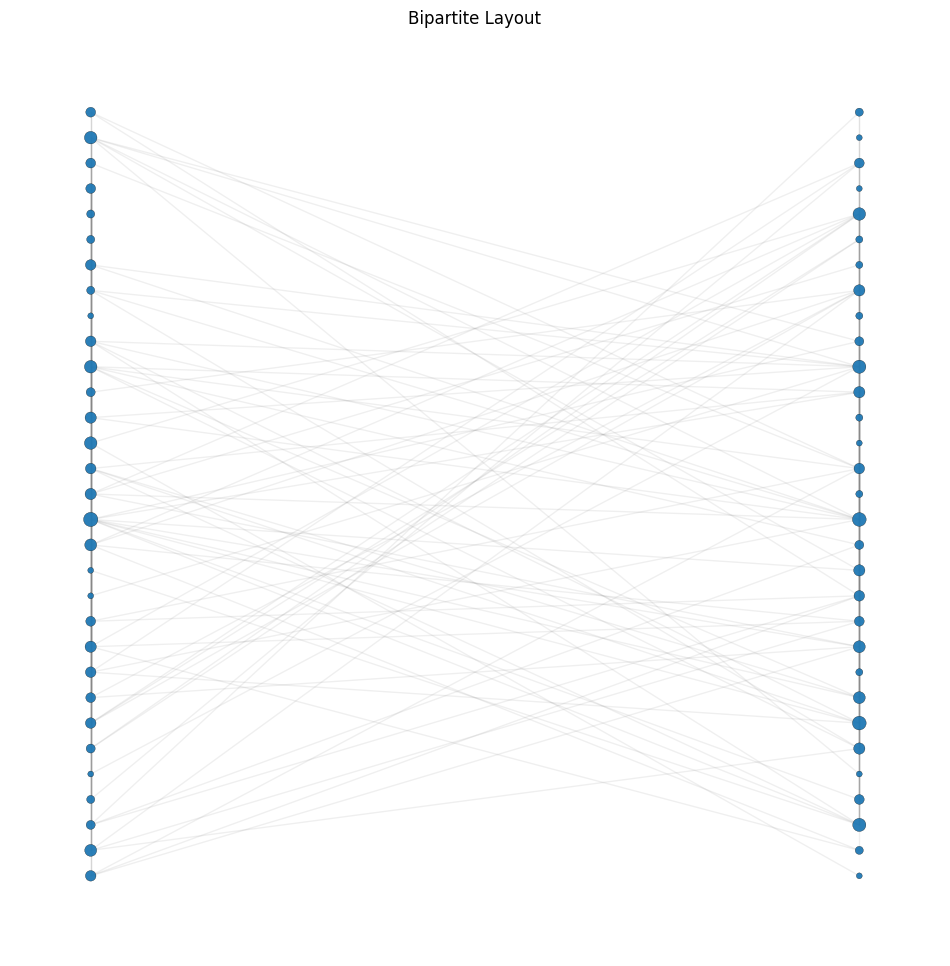

In [48]:
pos_bipartite = nx.bipartite_layout(G, nodes=range(len(G)//2))
draw_graph(G, pos_bipartite, "Bipartite Layout")

## bfs layout

Position nodes according to breadth-first search algorithm. (dolphins network because its a connected graph)

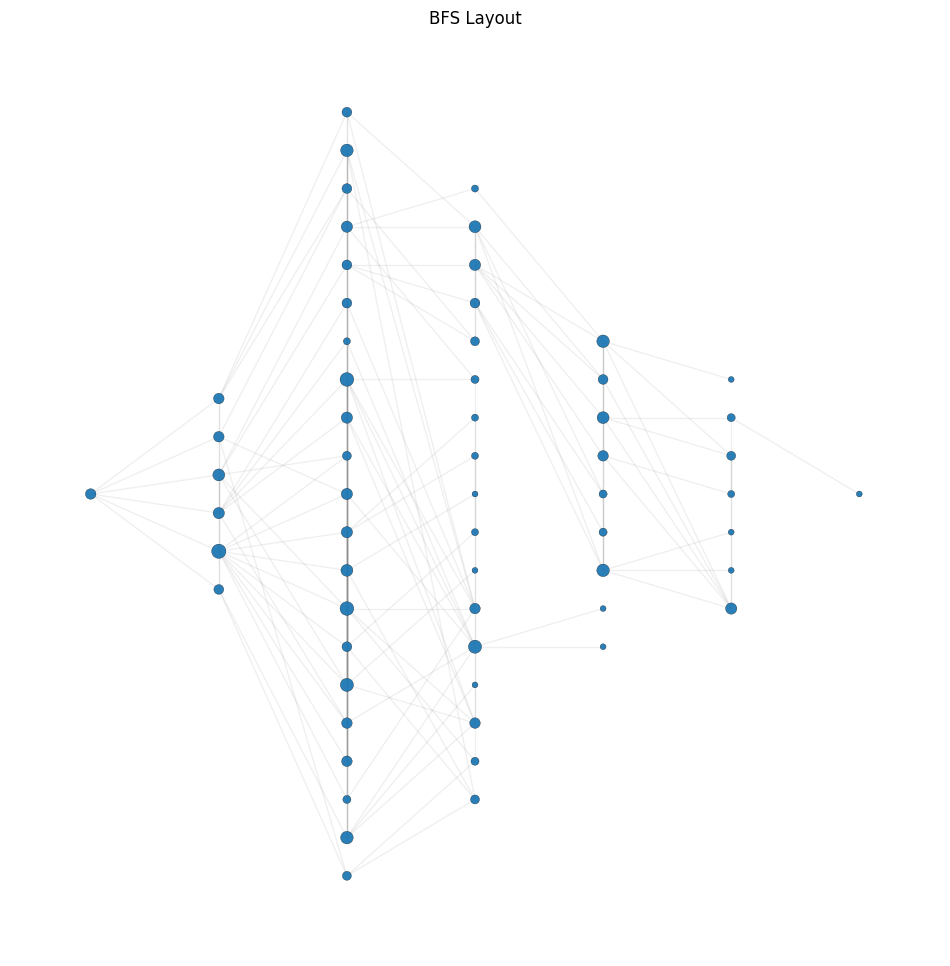

In [49]:
pos_bfs = nx.bfs_layout(G, start=0)
draw_graph(G, pos_bfs, "BFS Layout")

## circular layout

Position nodes on a circle.

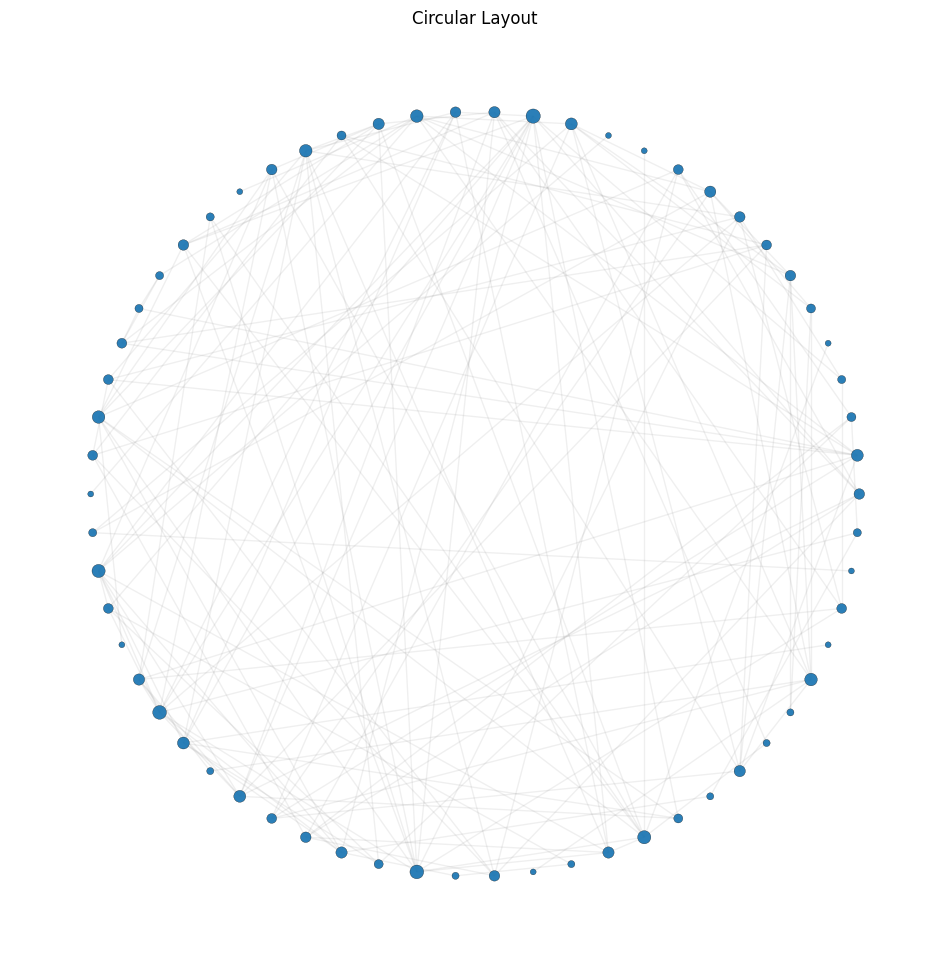

In [50]:
pos_circular = nx.circular_layout(G)
draw_graph(G, pos_circular, "Circular Layout")

## forceatlas2 layout

Position nodes using the ForceAtlas2 force-directed layout algorithm.

This function applies the ForceAtlas2 layout algorithm to a NetworkX graph, positioning the nodes in a way that visually represents the structure of the graph. The algorithm uses physical simulation to minimize the energy of the system, resulting in a more readable layout.

Compared with a plain spring layout, it adds smart behavior (continuous updates, gravity to keep components together, and adaptive repulsion) so hubs don’t suck everything in or make big empty gaps — the result looks more clustered and stable.
It also respects edge weights (stronger edges pull harder) and has performance options (Barnes‑Hut) for large graphs.

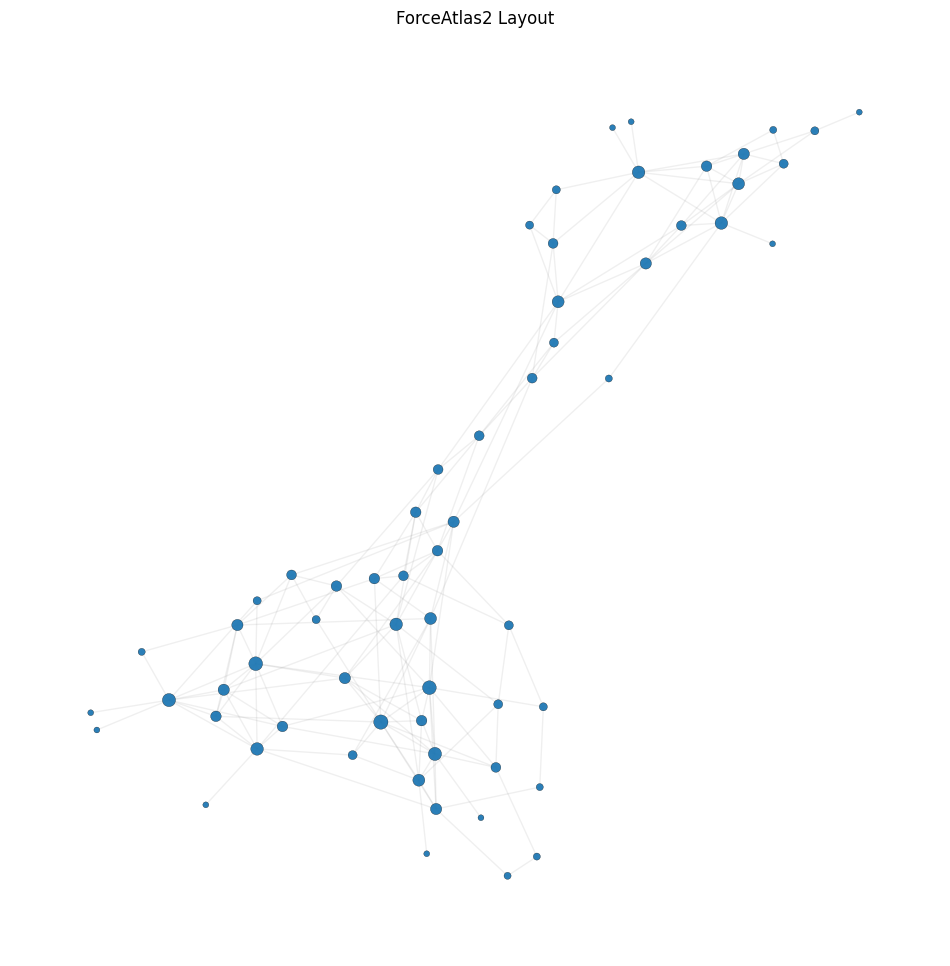

In [51]:
pos_fa2 = nx.forceatlas2_layout(G)
draw_graph(G, pos_fa2, "ForceAtlas2 Layout")

## kamada-kawai layout

Position nodes using Kamada-Kawai path-length cost-function.

it tries to draw the network so nodes that are "close" in the graph sit close on the plane and distant nodes sit far — this preserves global structure and symmetry well.
Tradeoffs: gives clean, symmetric layouts for small‑to‑medium graphs but is computationally heavier and can look cramped for large/dense graphs.

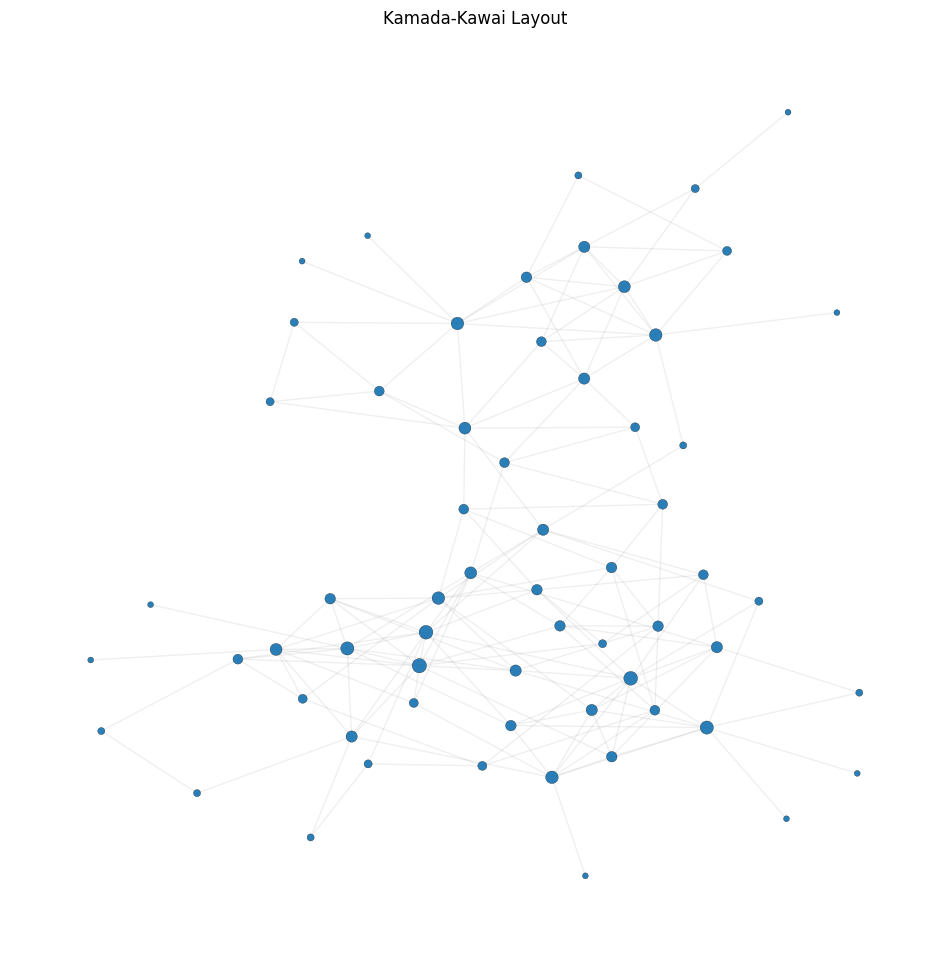

In [52]:
pos_kk = nx.kamada_kawai_layout(G)
draw_graph(G, pos_kk, "Kamada-Kawai Layout")

## planar layout

Position nodes without edge intersections.

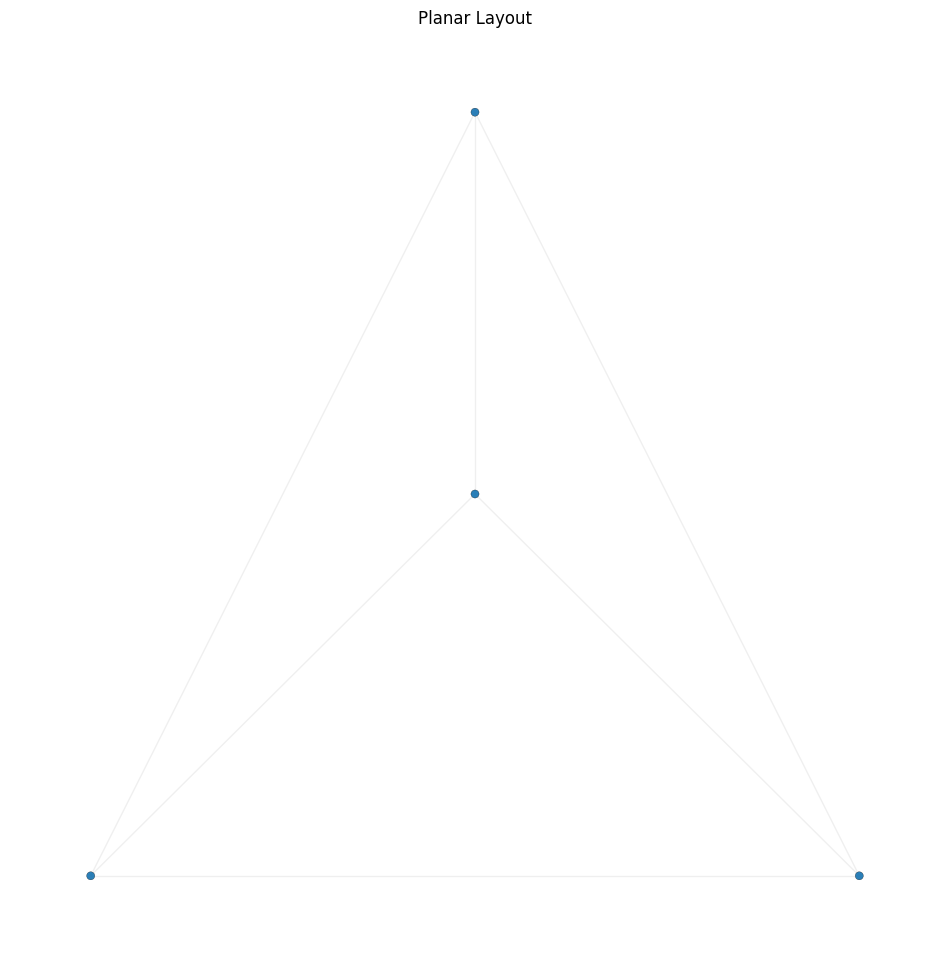

In [55]:
G_planar = nx.complete_graph(4)
pos_planar = nx.planar_layout(G_planar)
draw_graph(G_planar, pos_planar, "Planar Layout")

## shell layout

Position nodes in concentric circles.

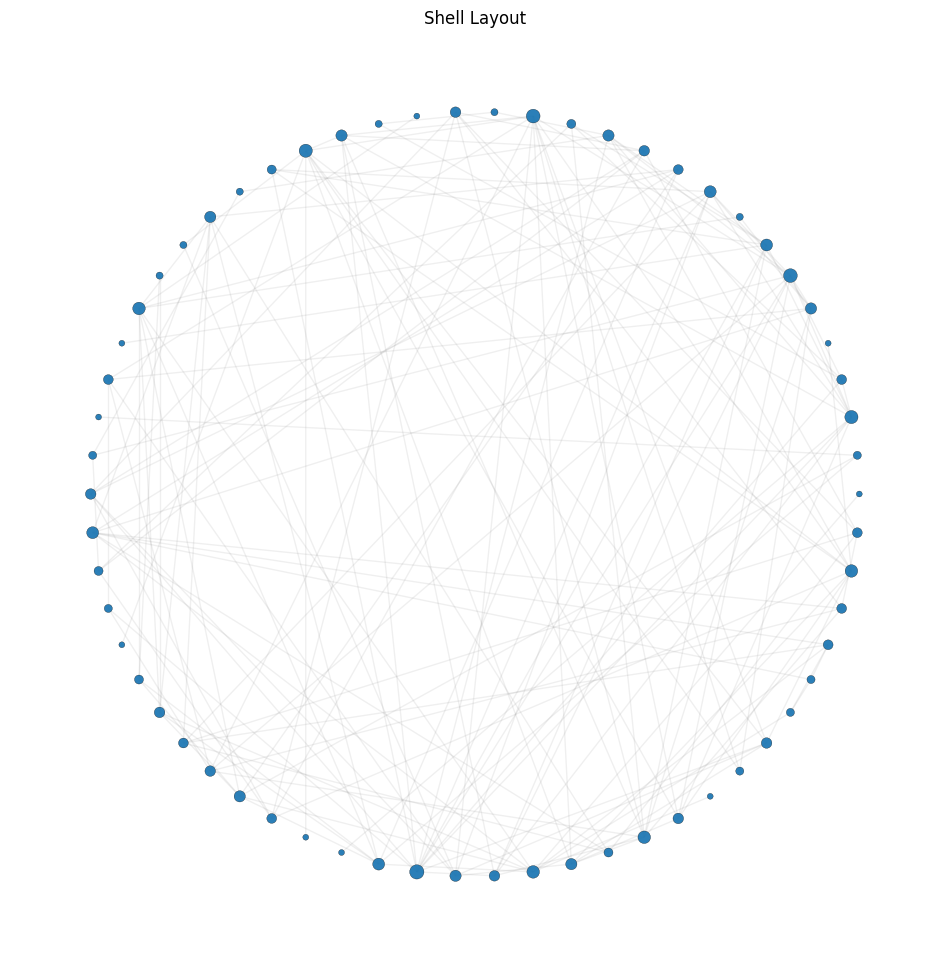

In [56]:
pos_shell = nx.shell_layout(G)
draw_graph(G, pos_shell, "Shell Layout")

## spring layout

Position nodes using Fruchterman-Reingold force-directed algorithm.

The algorithm simulates a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects, sometimes called an anti-gravity force. Simulation continues until the positions are close to an equilibrium.

Tradeoffs: fast and intuitive for small-to-medium graphs, but can produce clumps or large empty gaps for hubs or very dense graphs.

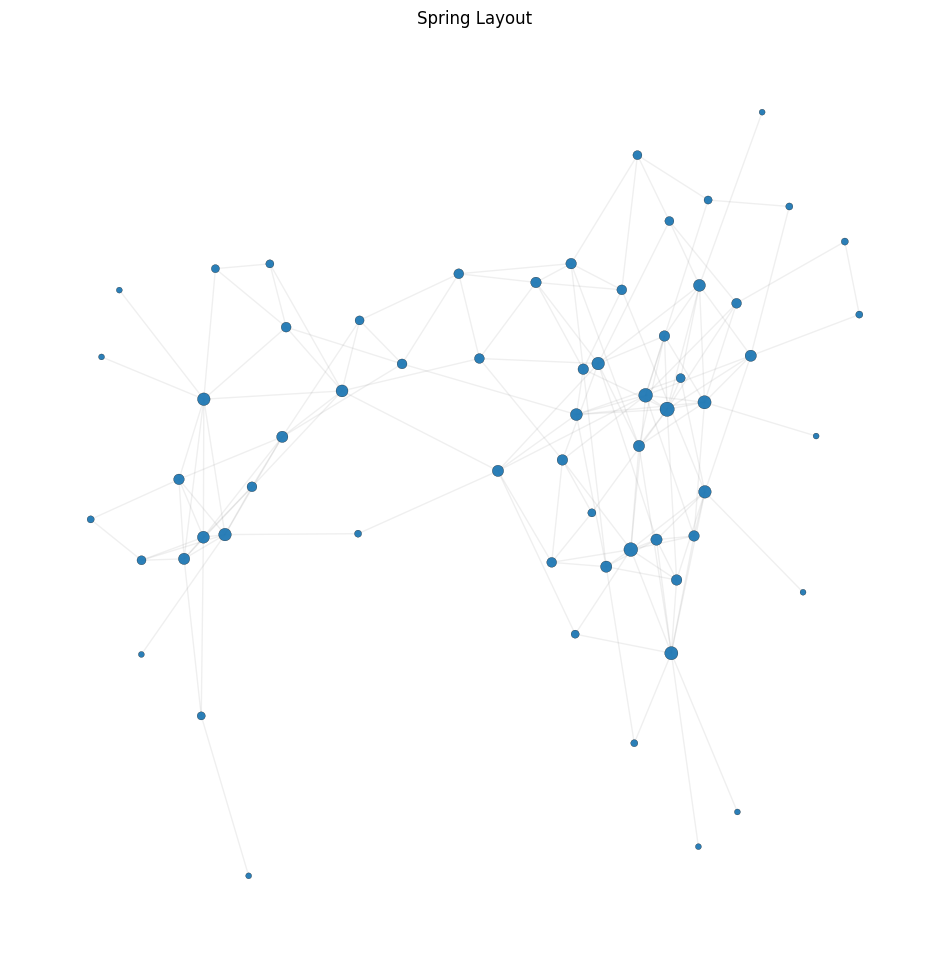

In [58]:
pos_spring = nx.spring_layout(G)
draw_graph(G, pos_spring, "Spring Layout")

## spectral layout

Position nodes using the eigenvectors of the graph Laplacian.

Using the unnormalized Laplacian, the layout shows possible clusters of nodes which are an approximation of the ratio cut. If dim is the number of dimensions then the positions are the entries of the dim eigenvectors corresponding to the ascending eigenvalues starting from the second one.

In plain terms: it uses a low‑dimensional embedding from the graph’s structural “frequencies” — this often reveals community structure and large‑scale clusters.
Tradeoffs: good for highlighting partitions and global structure, but it can produce overlapping nodes and isn’t force‑directed, so local geometry may look unnatural.

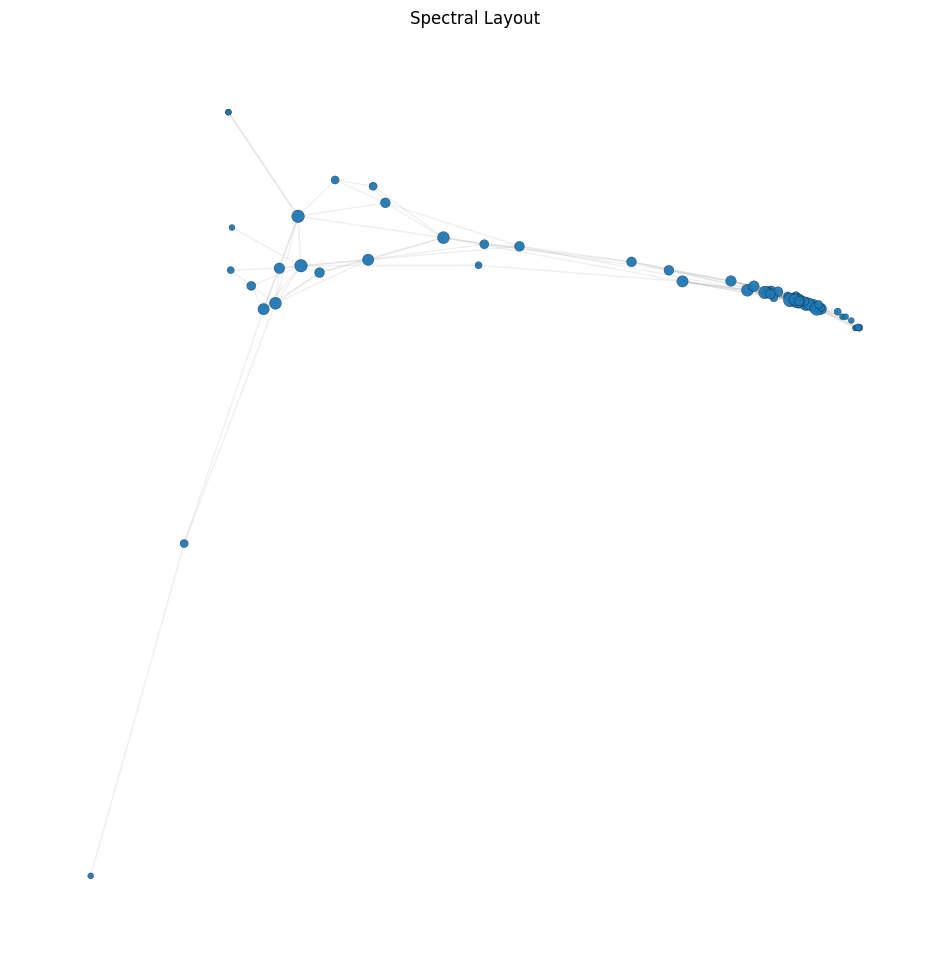

In [59]:
pos_spectral = nx.spectral_layout(G)
draw_graph(G, pos_spectral, "Spectral Layout")

## spiral layout

Position nodes in a spiral layout.

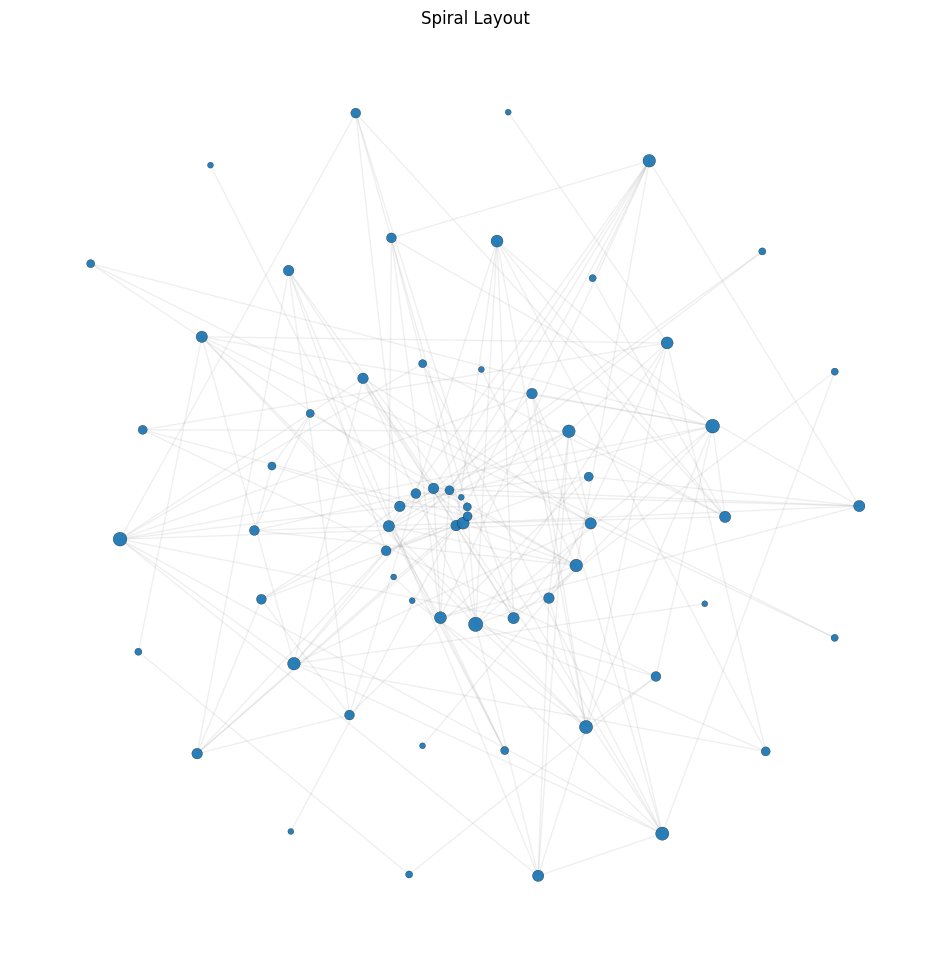

In [60]:
pos_spiral = nx.spiral_layout(G)
draw_graph(G, pos_spiral, "Spiral Layout")